In [ ]:
#temperature
#one hot encode month
#one hot encode day of week
#speed limit
#hour
#carriageway_hazards
#onehot encode light conditions
#population desnity


#population density from:
#Estimates of the population for the UK, England, Wales, Scotland and Northern Ireland
#Mid-2021 edition of this dataset
#https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland

In [ ]:
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data


In [ ]:
#to locate to virtual environment
#python -m venv .venv
# .venv\Scripts\activate.bat 

In [95]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
df = pd.read_csv('./accidentPopData2.csv')
df

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,population,hour,month
0,-0.191170,51.489096,1,2,1,1,3,6,30,1,2,2,0,1,143940.0,17,1
1,-0.211708,51.520075,1,3,1,1,4,3,30,4,1,1,0,1,143940.0,17,1
2,-0.206458,51.525301,1,3,2,1,5,6,30,4,1,1,0,1,143940.0,0,1
3,-0.173862,51.482442,1,3,1,1,6,6,30,1,1,1,0,1,143940.0,10,1
4,-0.156618,51.495752,1,3,1,1,2,6,30,7,1,2,0,1,143940.0,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401441,-0.094589,51.515904,48,3,1,1,1,6,20,4,1,1,0,1,8618.0,3,10
401442,-0.081663,51.516179,48,3,2,1,4,3,20,4,1,1,0,1,8618.0,21,11
401443,-0.084329,51.510710,48,2,2,1,3,6,20,1,1,1,0,1,8618.0,9,11
401444,-0.087819,51.516144,48,3,2,1,5,6,20,4,1,1,0,1,8618.0,18,12


In [69]:
df = df.drop(['number_of_casualties'], axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401446 entries, 0 to 401445
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   longitude                401446 non-null  float64
 1   latitude                 401446 non-null  float64
 2   police_force             401446 non-null  int64  
 3   accident_severity        401446 non-null  int64  
 4   number_of_vehicles       401446 non-null  int64  
 5   day_of_week              401446 non-null  int64  
 6   road_type                401446 non-null  int64  
 7   speed_limit              401446 non-null  int64  
 8   light_conditions         401446 non-null  int64  
 9   weather_conditions       401446 non-null  int64  
 10  road_surface_conditions  401446 non-null  int64  
 11  carriageway_hazards      401446 non-null  int64  
 12  urban_or_rural_area      401446 non-null  int64  
 13  population               401446 non-null  float64
 14  hour

In [ ]:
df = df.drop(['accident_index', 'accident_year', 'casualty_reference', 'local_authority_ons_district', 'local_authority_highway',  'pedestrian_crossing_human_control', 'junction_control', 'local_authority_district', 'car_passenger',
'location_northing_osgr', 'casualty_class', 'casualty_severity', 'car_passenger', 
'location_easting_osgr', 'special_conditions_at_site', 'casualty_type', 'district', 
'junction_detail', 'pedestrian_crossing_physical_facilities', 'number_of_casualties'], axis = 1)

In [71]:
df.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,day_of_week,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,population,hour,month
0,-0.191170,51.489096,1,2,1,3,6,30,1,2,2,0,1,143940.0,17,1
1,-0.211708,51.520075,1,3,1,4,3,30,4,1,1,0,1,143940.0,17,1
2,-0.206458,51.525301,1,3,2,5,6,30,4,1,1,0,1,143940.0,0,1
3,-0.173862,51.482442,1,3,1,6,6,30,1,1,1,0,1,143940.0,10,1
4,-0.156618,51.495752,1,3,1,2,6,30,7,1,2,0,1,143940.0,21,1


In [7]:

hours = []

for ele in df['time'].values:
    hour = ele.split(':')
    hours.append(int(hour[0]))
    #print(hours)
    
df["hour"] = hours
df = df.drop(['time'], axis=1)

months = []

for ele in df['date'].values:
    month = ele.split('/')
    months.append(int(month[1]))
    #print(hours)
    
df["month"] = months
df = df.drop(['date'], axis=1)

In [73]:
cols_to_exclude = ['longitude', 'latitude', 'number_of_vehicles', 
                     'hour','speed_limit', 'population']
cols_to_exclude
for col in df.columns:
    if col not in cols_to_exclude:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401446 entries, 0 to 401445
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   longitude                401446 non-null  float64 
 1   latitude                 401446 non-null  float64 
 2   police_force             401446 non-null  category
 3   accident_severity        401446 non-null  category
 4   number_of_vehicles       401446 non-null  int64   
 5   day_of_week              401446 non-null  category
 6   road_type                401446 non-null  category
 7   speed_limit              401446 non-null  int64   
 8   light_conditions         401446 non-null  category
 9   weather_conditions       401446 non-null  category
 10  road_surface_conditions  401446 non-null  category
 11  carriageway_hazards      401446 non-null  category
 12  urban_or_rural_area      401446 non-null  category
 13  population               401446 non-null  fl

In [9]:
df.to_csv('./accidentPopData2.csv', index=False)

In [72]:
df['accident_severity'].mask(df['accident_severity'] == 3.0, int(0), inplace=True)
df['accident_severity'].mask(df['accident_severity'] == 2.0, int(1), inplace=True)
df['accident_severity'].mask(df['accident_severity'] == 1.0, int(1), inplace=True)

In [78]:
df.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,day_of_week,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,population,hour,month
0,-0.191170,51.489096,1,1,1,3,6,30,1,2,2,0,1,143940.0,17,1
1,-0.211708,51.520075,1,0,1,4,3,30,4,1,1,0,1,143940.0,17,1
2,-0.206458,51.525301,1,0,2,5,6,30,4,1,1,0,1,143940.0,0,1
3,-0.173862,51.482442,1,0,1,6,6,30,1,1,1,0,1,143940.0,10,1
4,-0.156618,51.495752,1,0,1,2,6,30,7,1,2,0,1,143940.0,21,1


In [74]:
neg, pos = np.bincount(df['accident_severity'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 401446
    Positive: 50225 (12.51% of total)



In [ ]:
neg, pos = np.bincount(df['accidentSeverity'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

In [75]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.02)
train_df, val_df = train_test_split(df, test_size=0.02)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('accident_severity'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('accident_severity'))
test_labels = np.array(test_df.pop('accident_severity'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [76]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (393417,)
Validation labels shape: (8029,)
Test labels shape: (8029,)
Training features shape: (393417, 15)
Validation features shape: (8029, 15)
Test features shape: (8029, 15)


In [49]:
sns.set_theme(style="white", palette=None)

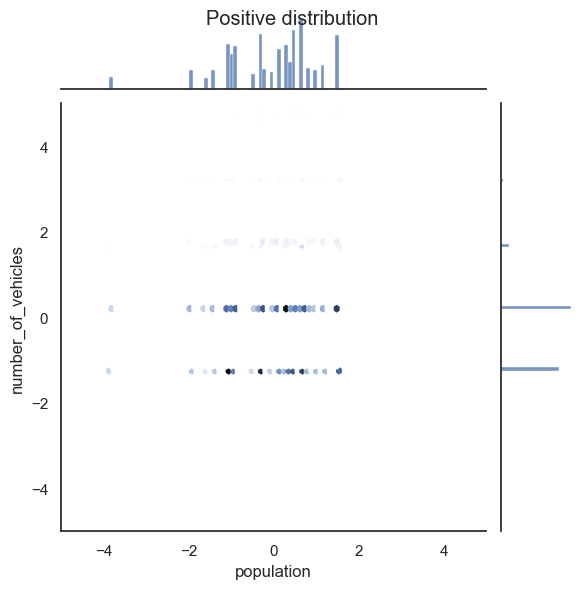

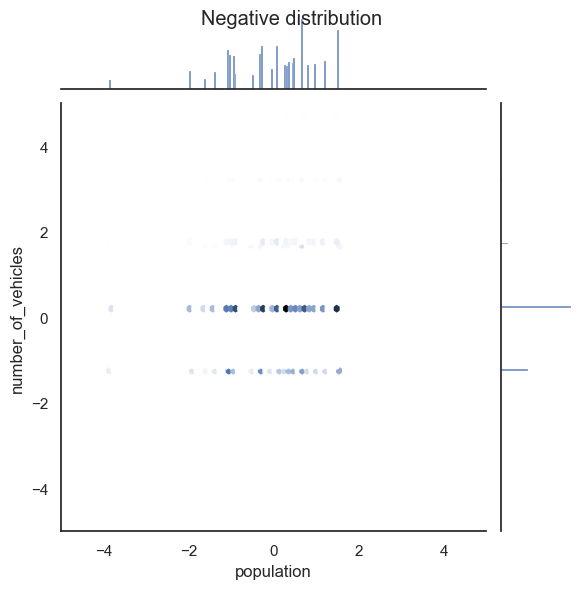

In [79]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['population'], y=pos_df['number_of_vehicles'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['population'], y=neg_df['number_of_vehicles'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")



In [80]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [81]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [82]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 449ms/step


array([[0.52685237],
       [0.7485013 ],
       [0.5397697 ],
       [0.5041422 ],
       [0.61297435],
       [0.47334915],
       [0.55185443],
       [0.43104735],
       [0.38604015],
       [0.07429238]], dtype=float32)

In [84]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6993


In [85]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.94490274])

In [86]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 42ms/step


array([[0.12430236],
       [0.05621435],
       [0.07280175],
       [0.11034682],
       [0.08585935],
       [0.07249672],
       [0.15066509],
       [0.11662531],
       [0.07041897],
       [0.4618763 ]], dtype=float32)

In [87]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3938


In [88]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [89]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [90]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [98]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
                label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
                label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

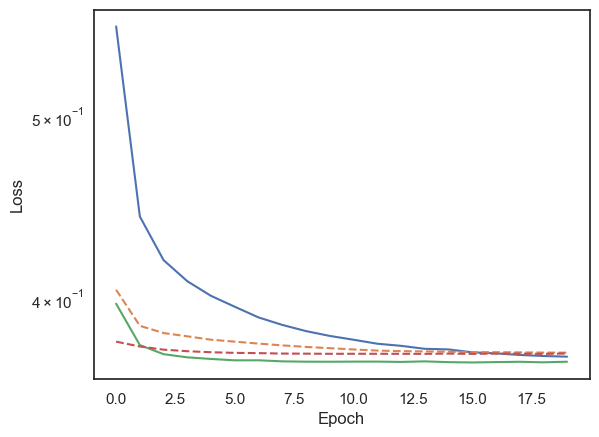

In [99]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [100]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
193/193 [==============================] - 2s 5ms/step - loss: 0.3976 - tp: 363.0000 - fp: 2037.0000 - tn: 349184.0000 - fn: 49862.0000 - accuracy: 0.8707 - precision: 0.1513 - recall: 0.0072 - auc: 0.5198 - prc: 0.1337 - val_loss: 0.3792 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 7003.0000 - val_fn: 1026.0000 - val_accuracy: 0.8722 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5727 - val_prc: 0.1558
Epoch 2/100
193/193 [==============================] - 0s 2ms/step - loss: 0.3779 - tp: 42.0000 - fp: 147.0000 - tn: 344071.0000 - fn: 49157.0000 - accuracy: 0.8747 - precision: 0.2222 - recall: 8.5368e-04 - auc: 0.5510 - prc: 0.1491 - val_loss: 0.3771 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 7003.0000 - val_fn: 1026.0000 - val_accuracy: 0.8722 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5953 - val_prc: 0.1747
Epoch 3/100
193/193 [==============================] - 0s 2ms/step - loss: 0.3737 - tp: 10.0000 - fp: 37.000

In [102]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

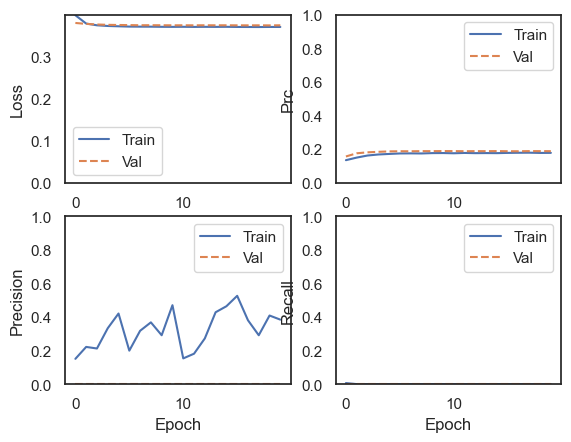

In [103]:
plot_metrics(baseline_history)

In [104]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 2ms/step


In [106]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Slight Accidents Detected (True Negatives): ', cm[0][0])
  print('Legitimate Slight Accidents Incorrectly Detected (False Positives): ', cm[0][1])
  print('Severe Accidents Missed (False Negatives): ', cm[1][0])
  print('Severe Accidents Detected (True Positives): ', cm[1][1])
  print('Total Severe Accidentss: ', np.sum(cm[1]))

loss :  0.371102899312973
tp :  0.0
fp :  0.0
tn :  7016.0
fn :  1013.0
accuracy :  0.8738323450088501
precision :  0.0
recall :  0.0
auc :  0.6071340441703796
prc :  0.18771305680274963

Legitimate Slight Accidents Detected (True Negatives):  7016
Legitimate Slight Accidents Incorrectly Detected (False Positives):  0
Severe Accidents Missed (False Negatives):  1013
Severe Accidents Detected (True Positives):  0
Total Severe Accidentss:  1013


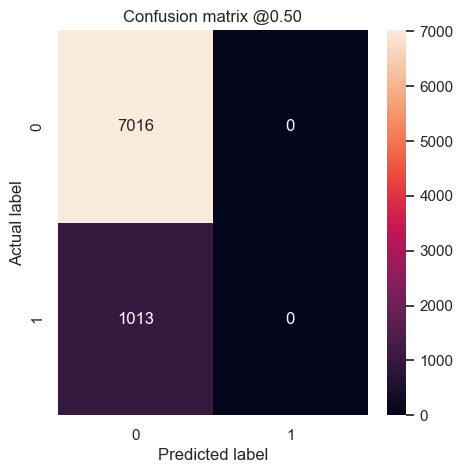

In [107]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [108]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

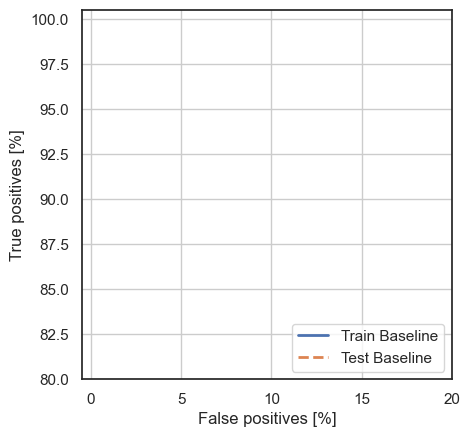

In [111]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline)
plot_roc("Test Baseline", test_labels, test_predictions_baseline, linestyle='--')
plt.legend(loc='lower right');

In [112]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

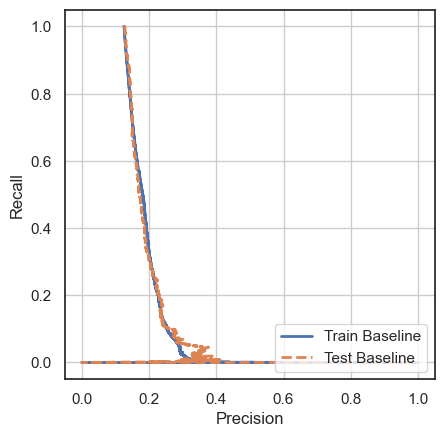

In [113]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, )
plot_prc("Test Baseline", test_labels, test_predictions_baseline, linestyle='--')
plt.legend(loc='lower right');

In [114]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 4.00


In [115]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
193/193 [==============================] - 2s 5ms/step - loss: 0.9234 - tp: 8612.0000 - fp: 54452.0000 - tn: 296782.0000 - fn: 41600.0000 - accuracy: 0.7607 - precision: 0.1366 - recall: 0.1715 - auc: 0.5143 - prc: 0.1320 - val_loss: 0.5502 - val_tp: 162.0000 - val_fp: 914.0000 - val_tn: 6089.0000 - val_fn: 864.0000 - val_accuracy: 0.7786 - val_precision: 0.1506 - val_recall: 0.1579 - val_auc: 0.5529 - val_prc: 0.1476
Epoch 2/100
193/193 [==============================] - 1s 3ms/step - loss: 0.7859 - tp: 16676.0000 - fp: 100609.0000 - tn: 243609.0000 - fn: 32523.0000 - accuracy: 0.6616 - precision: 0.1422 - recall: 0.3389 - auc: 0.5300 - prc: 0.1399 - val_loss: 0.5775 - val_tp: 244.0000 - val_fp: 1193.0000 - val_tn: 5810.0000 - val_fn: 782.0000 - val_accuracy: 0.7540 - val_precision: 0.1698 - val_recall: 0.2378 - val_auc: 0.5811 - val_prc: 0.1647
Epoch 3/100
193/193 [==============================] - 1s 3ms/step - loss: 0.7505 - tp: 17721.0000 - fp: 102625.0000 - tn: 241593

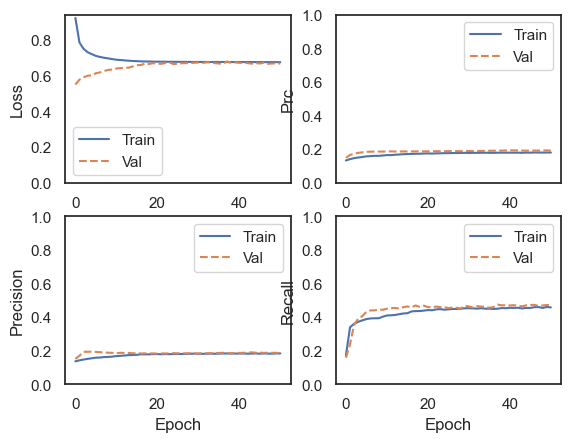

In [116]:
plot_metrics(weighted_history)

In [117]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 2ms/step


loss :  0.6730064749717712
tp :  462.0
fp :  2132.0
tn :  4884.0
fn :  551.0
accuracy :  0.6658363342285156
precision :  0.17810331284999847
recall :  0.45607107877731323
auc :  0.6120933294296265
prc :  0.19080723822116852

Legitimate Slight Accidents Detected (True Negatives):  4884
Legitimate Slight Accidents Incorrectly Detected (False Positives):  2132
Severe Accidents Missed (False Negatives):  551
Severe Accidents Detected (True Positives):  462
Total Severe Accidentss:  1013


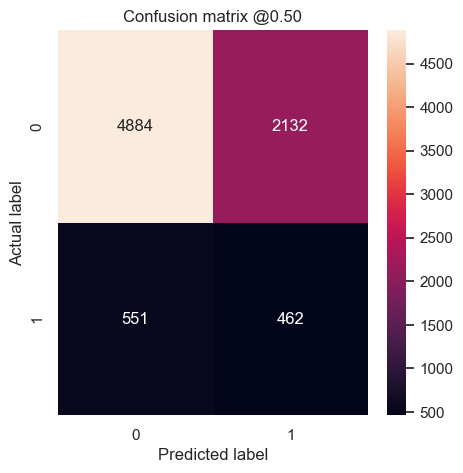

In [118]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

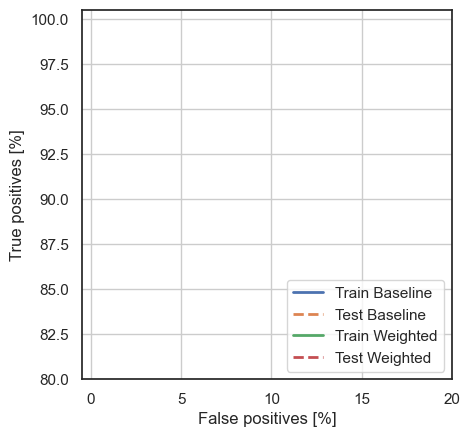

In [121]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, )
plot_roc("Test Baseline", test_labels, test_predictions_baseline,  linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, )
plot_roc("Test Weighted", test_labels, test_predictions_weighted,  linestyle='--')


plt.legend(loc='lower right');

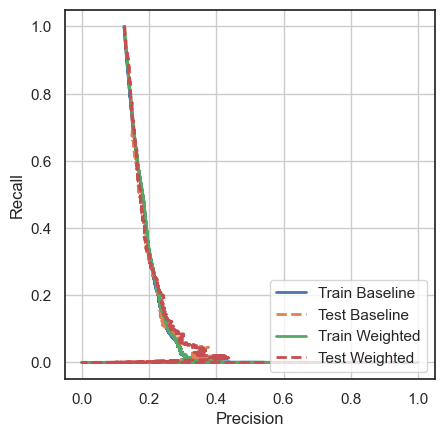

In [122]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, )
plot_prc("Test Baseline", test_labels, test_predictions_baseline, linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, )
plot_prc("Test Weighted", test_labels, test_predictions_weighted,linestyle='--')


plt.legend(loc='lower right');

In [123]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [124]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(344218, 15)

In [125]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(688436, 15)

In [126]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [127]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 0.1296581  -1.06725769 -0.11748172  0.23345574  0.97832519  0.45029514
 -0.11291363 -0.66271146 -0.29671755 -0.3393439  -0.13673469 -0.16799992
  0.50230727 -0.69020314  0.3546525 ]

Label:  1


In [128]:
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [129]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.53125


In [130]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

343.0

In [131]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
343/343 [==============================] - 6s 13ms/step - loss: 0.7154 - tp: 189809.0000 - fp: 171432.0000 - tn: 186716.0000 - fn: 162536.0000 - accuracy: 0.5299 - precision: 0.5254 - recall: 0.5387 - auc: 0.5369 - prc: 0.5283 - val_loss: 0.6828 - val_tp: 556.0000 - val_fp: 2706.0000 - val_tn: 4297.0000 - val_fn: 470.0000 - val_accuracy: 0.6044 - val_precision: 0.1704 - val_recall: 0.5419 - val_auc: 0.5942 - val_prc: 0.1723
Epoch 2/100
343/343 [==============================] - 4s 11ms/step - loss: 0.6838 - tp: 170120.0000 - fp: 125640.0000 - tn: 225082.0000 - fn: 181622.0000 - accuracy: 0.5626 - precision: 0.5752 - recall: 0.4836 - auc: 0.5796 - prc: 0.5769 - val_loss: 0.6765 - val_tp: 492.0000 - val_fp: 2174.0000 - val_tn: 4829.0000 - val_fn: 534.0000 - val_accuracy: 0.6627 - val_precision: 0.1845 - val_recall: 0.4795 - val_auc: 0.6050 - val_prc: 0.1848
Epoch 3/100
343/343 [==============================] - 4s 11ms/step - loss: 0.6795 - tp: 157523.0000 - fp: 104080.0000 -

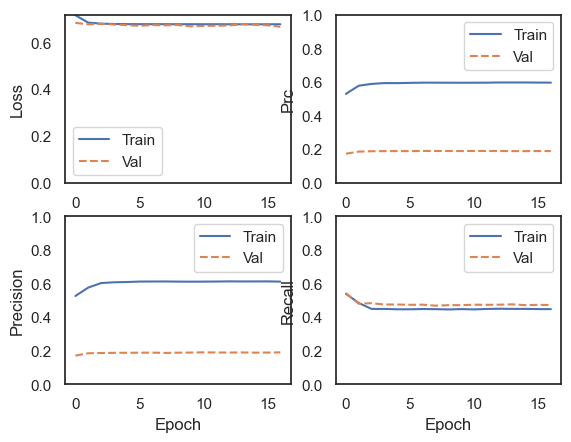

In [132]:
plot_metrics(resampled_history)

In [133]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 3s 38ms/step - loss: 0.7913 - tp: 11165.0000 - fp: 12625.0000 - tn: 14905.0000 - fn: 10294.0000 - accuracy: 0.5322 - precision: 0.4693 - recall: 0.5203 - auc: 0.5183 - prc: 0.4687 - val_loss: 0.7099 - val_tp: 544.0000 - val_fp: 3538.0000 - val_tn: 3465.0000 - val_fn: 482.0000 - val_accuracy: 0.4993 - val_precision: 0.1333 - val_recall: 0.5302 - val_auc: 0.5142 - val_prc: 0.1329
Epoch 2/1000
20/20 [==============================] - 0s 17ms/step - loss: 0.7654 - tp: 10648.0000 - fp: 10445.0000 - tn: 10138.0000 - fn: 9729.0000 - accuracy: 0.5075 - precision: 0.5048 - recall: 0.5225 - auc: 0.5101 - prc: 0.5099 - val_loss: 0.6986 - val_tp: 526.0000 - val_fp: 3363.0000 - val_tn: 3640.0000 - val_fn: 500.0000 - val_accuracy: 0.5189 - val_precision: 0.1353 - val_recall: 0.5127 - val_auc: 0.5249 - val_prc: 0.1362
Epoch 3/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.7445 - tp: 10907.0000 - fp: 10244.0000 - tn: 10182.000

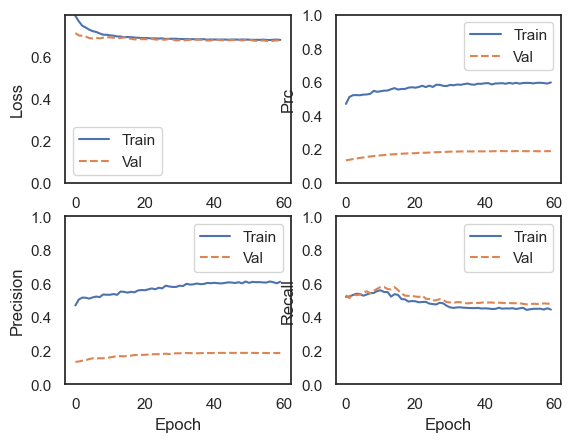

In [134]:
plot_metrics(resampled_history)

In [135]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

4/4 [==============================] - 0s 3ms/step


loss :  0.6786285042762756
tp :  468.0
fp :  2207.0
tn :  4809.0
fn :  545.0
accuracy :  0.657242476940155
precision :  0.17495326697826385
recall :  0.46199408173561096
auc :  0.605114758014679
prc :  0.18519479036331177

Legitimate Slight Accidents Detected (True Negatives):  4809
Legitimate Slight Accidents Incorrectly Detected (False Positives):  2207
Severe Accidents Missed (False Negatives):  545
Severe Accidents Detected (True Positives):  468
Total Severe Accidentss:  1013


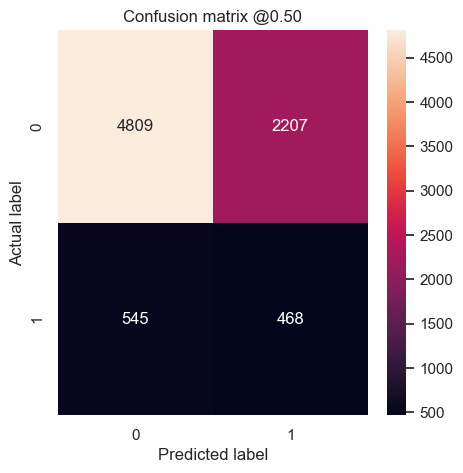

In [136]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

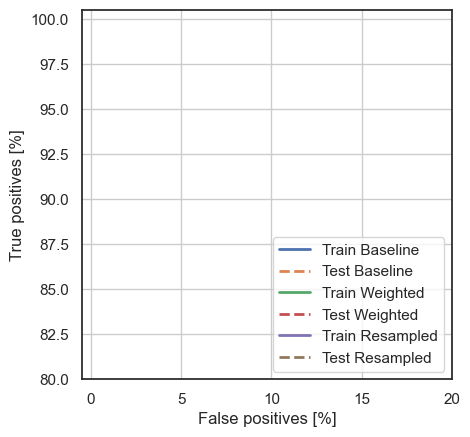

In [137]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, )
plot_roc("Test Baseline", test_labels, test_predictions_baseline,  linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, )
plot_roc("Test Weighted", test_labels, test_predictions_weighted,  linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, )
plot_roc("Test Resampled", test_labels, test_predictions_resampled, linestyle='--')
plt.legend(loc='lower right');

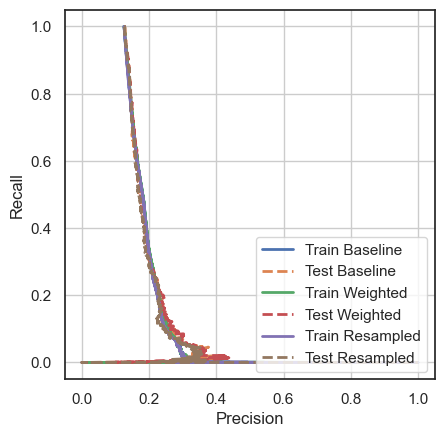

In [138]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, )
plot_prc("Test Baseline", test_labels, test_predictions_baseline, linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, )
plot_prc("Test Weighted", test_labels, test_predictions_weighted,  linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, )
plot_prc("Test Resampled", test_labels, test_predictions_resampled,  linestyle='--')
plt.legend(loc='lower right');